In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_dice(
    task='brain', 
    methods=['unet', 'downstream'], 
    directory="../../results-tmp/"
):    
    dfs = []
    for method in methods:
        raw = np.load(f"{directory}{task}_{method}_results.npy",allow_pickle=True).item()
        # from dict to df
        df = pd.DataFrame.from_dict(raw)
        # transform into long format for seaborn
        df_long = df.melt(ignore_index=False).reset_index()
        # rename "index" column to 'iterator'
        df_long = df_long.rename(columns={'index': 'it'})
        df_long['method'] = method
        # in case of brain data, select surface dice as measure
        if task == 'brain':
            df_long['value'] = df_long['value'].apply(lambda x: x['Volumetric Dice'])
        # concat dataframes
        dfs.append(df_long.copy(deep=True))
        
    return pd.concat(dfs)

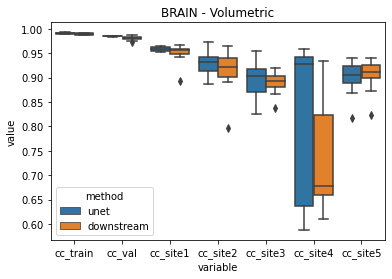

In [4]:
### config
task = 'brain'
methods = ['unet', 'downstream']
directory = "../../results-tmp/"

### data
df = plot_dice(task=task, methods=methods, directory=directory)
### plotting
sns.boxplot(data=df, x='variable', y='value', hue='method')

title = task.upper()
title = title + " - Volumetric" if task == 'brain' else title
plt.title(f"{title}")
plt.show()

In [34]:
raw = np.load(f"{directory}{task}_unet_results.npy",allow_pickle=True).item()
df = pd.DataFrame.from_dict(raw)

In [39]:
df = df.applymap(lambda x: x['Volumetric Dice'])

In [43]:
df.mean()

cc_train    0.991046
cc_val      0.985357
cc_site1    0.958675
cc_site2    0.929590
cc_site3    0.896902
cc_site4    0.816435
cc_site5    0.900862
dtype: float64

In [44]:
raw = np.load(f"{directory}{task}_unet_results.npy",allow_pickle=True).item()
df = pd.DataFrame.from_dict(raw)

In [45]:
df = df.applymap(lambda x: x['Surface Dice'])

In [46]:
df.mean()

cc_train    0.987272
cc_val      0.964324
cc_site1    0.815909
cc_site2    0.793506
cc_site3    0.804340
cc_site4    0.678126
cc_site5    0.717917
dtype: float64

In [49]:
import torch

In [52]:
torch.load('../../results-tmp/results/eval/mms/image/mms-ensemble-corr-A-9').compute()

tensor(0.1769)